# Render example

pyrender https://github.com/mmatl/pyrender/

In [23]:
import os
import trimesh
import pyrender
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from pathlib import Path
from json import JSONEncoder




In [2]:
%matplotlib inline

In [4]:
DIR_SOURCE = Path('/media/Linux_4Tb/synth3d/tablets_30/corrupted')
assert DIR_SOURCE.exists()

DIR_OUT = Path('/media/Linux_4Tb/synth3d/tablets_30/png')
if not DIR_OUT.exists():
    os.makedirs(DIR_OUT)


AssertionError: 

In [7]:
fnames = sorted(DIR_SOURCE.glob('*.ply'))

In [10]:
def render(fn, camera, camera_pos, size=(400, 400)):
    fuze_trimesh = trimesh.load(fn)
    fuze_trimesh.apply_scale(0.03)
    
    mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
    scene = pyrender.Scene()
    scene.add(mesh)
    
    scene.add(camera, pose=camera_pose)

    #light = pyrender.SpotLight(color=[1.0, 1, 0], intensity=2.0,
    #                            innerConeAngle=np.pi/16.0,
    #                            outerConeAngle=np.pi/6.0)
    # scene.add(light, pose=camera_pose)
    light = pyrender.PointLight(color=[1.0, 0.0, 0.0], intensity=20.0)
    #scene.add(light, camera_pos)
    scene.add(light)
    
    r = pyrender.OffscreenRenderer(size[0], size[1])
    
    color, depth = r.render(scene)
    
    return color, depth

class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

def save_camera_info(fn, camera, camera_pose):
    d = {}
    d['camera']  = {
        'projection_matrix': camera.get_projection_matrix(),
        'pos': camera_pose,
    }
    with open(fn, "w") as f:
        json.dump(d, f, cls=NumpyArrayEncoder) 

def show(color, depth, figsize=(16, 16)):
    fig, ax = plt.subplots(figsize=figsize)
    
    #ax.axis('off')
    ax.imshow(color)

    

About camera's positions:

- https://pyrender.readthedocs.io/en/latest/examples/cameras.html
- https://github.com/KhronosGroup/glTF/tree/master/specification/2.0#projection-matrices

In [11]:
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
     [.5, 0,   0,   1.],
     [0.0,  .5, 0.0, 1.],
     [0.0,  0,   .2,   2],
     [0.0,  0.0, 0.0, 1.0],
  ])


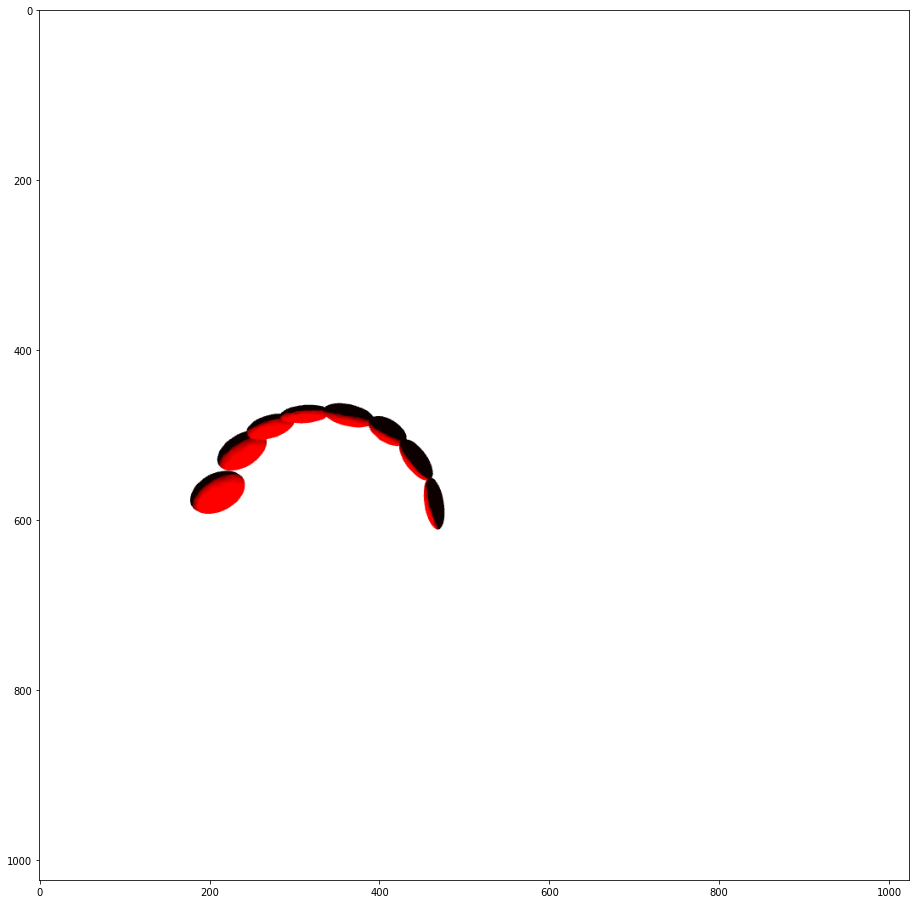

In [38]:
for fn in fnames:
    
    color, depth = render(fn, camera, camera_pose, (1024, 1024))

    fn_out = DIR_OUT / fn.with_suffix('.png').name
    mpimg.imsave(fn_out, color)
    
    fn = DIR_OUT / fn.with_suffix('.info').name
    save_camera_info(fn, camera, camera_pose)

show(color, depth)